In [330]:
import numpy as np
import matplotlib.pyplot as plt

In [331]:
data=np.array([[0.4,1.1],[1.2,1.9],[1.9,1.7],[2,2.8],[2.8,2.3]])
x=np.array([i[0] for i in data])
y=np.array([i[1] for i in data])
n=len(data)
d=len(data[0])

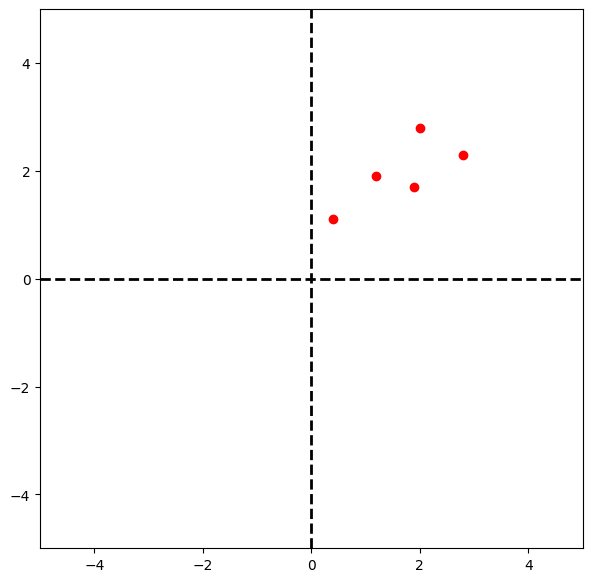

In [332]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.axvline(color = 'black',linestyle='dashed',lw=2)
ax.axhline(color = 'black',linestyle='dashed',lw=2)

ax.plot(x,y,'o',color='red')

In [333]:
def centralize(data):
    mean=[0]*2
    for i in data:
        mean[0]+=i[0]
        mean[1]+=i[1]
    mean[0]/=n
    mean[1]/=n
    print(f'{mean} are the means of x and y')
    for i in range(len(data)):
        data[i][0]-=mean[0]
        data[i][1]-=mean[1]
    return data
    

[1.6600000000000001, 1.9600000000000002] are the means of x and y


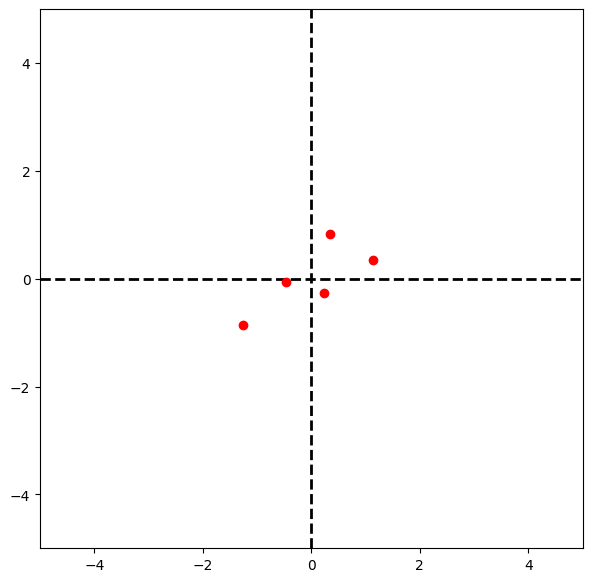

In [334]:
data=centralize(data)
x=np.array([i[0] for i in data])
y=np.array([i[1] for i in data])

fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.axvline(color = 'black',linestyle='dashed',lw=2)
ax.axhline(color = 'black',linestyle='dashed',lw=2)

ax.plot(x,y,'o',color='red')


In [335]:
cov=(1/n)*data.T@data

In [336]:
eig_val,eig_vec=np.linalg.eig(cov)
print(eig_vec)

[[ 0.84555709 -0.53388502]
 [ 0.53388502  0.84555709]]


In [337]:
def squared_distance(x,y,vec):
    sq=lambda z:z*z
    projections=[]
    for i in range(len(x)):
        c=x[i]*vec[0]+y[i]*vec[1]
        projections.append((np.linalg.norm((c*x[i],c*y[i])))**2)
    return sum(projections)
        

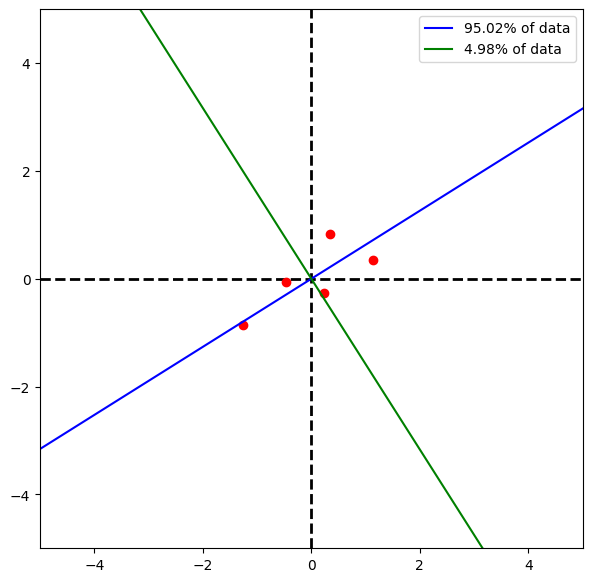

In [338]:
fig,ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)


ax.axvline(color = 'black',linestyle='dashed',lw=2)
ax.axhline(color = 'black',linestyle='dashed',lw=2)

ax.plot(x,y,'o',color='red')

s=np.linspace(-5,5,100)


ssd1=squared_distance(x,y,[eig_vec[0,0],eig_vec[1,0]])
ssd2=squared_distance(x,y,[eig_vec[0,1],eig_vec[1,1]])


ax.plot(s, s*(eig_vec[1][0]/eig_vec[0][0]), '-b', label=f'{round(ssd1/(ssd1+ssd2)*100,2)}% of data')
ax.legend(loc="upper right")

ax.plot(s, s*(eig_vec[1][1]/eig_vec[0][1]), '-g', label=f'{round(ssd2/(ssd1+ssd2)*100,2)}% of data')
ax.legend(loc="upper right")